# Data Processing with Pandas - Spotify Top 50 Tracks of 2020

Ever wondered what makes a song a global hit? This analysis dives into Spotify's Top 50 tracks of 2020 to uncover the hidden musical DNA that defines popular music, from energy levels to danceability, and how these attributes shape our listening experiences.

### Key Questions to Answer:

1. What are the dominant genres in 2020's top charts?
2. Are there specific audio features that consistently appear in popular tracks?
3. Can we identify distinct 'types' of hit songs based on their characteristics?

In [1]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext blackcellmagic

## 1. Load & Display Data

First, we load the data and inspect its structure to ensure it's ready for analysis. We'll check the first few rows and column data types.

The CSV file has its own index column, so we instruct pandas to use the first column (index 0)

In [3]:
# Load CSV file and set the first column as the DataFrame index
df = pd.read_csv("spotify/spotifytoptracks.csv", index_col=0)
df.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


In [4]:
# Display basic info about the generated data
print(f"\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50 non-null     object 
 1   album             50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   energy            50 non-null     float64
 5   danceability      50 non-null     float64
 6   key               50 non-null     int64  
 7   loudness          50 non-null     float64
 8   acousticness      50 non-null     float64
 9   speechiness       50 non-null     float64
 10  instrumentalness  50 non-null     float64
 11  liveness          50 non-null     float64
 12  valence           50 non-null     float64
 13  tempo             50 non-null     float64
 14  duration_ms       50 non-null     int64  
 15  genre             50 non-null     object 
dtypes: float64(9), int64(2), object(5)

#### Initial Data Overview:

- The dataset contains 50 rows and 16 columns
- There are no missing values
- Provides an overview of popular music attributes: energy, danceability, key, loudness, acousticness, speechiness, instrumentalness, liveness, valence, tempo, duration_ms.
- Note: duration_ms is in miliseconds. We will convert it to minutes and seconds later
- Provides genres from R&B/Soul to Dance/Electronic.
- The dataset is relatively small, consuming only 6.6+ KB of memory, making it efficient to work with.

## 2. Data Cleaning

Standardize text formatting, remove redundant columns, and address missing and duplicate values.

In [5]:
# Capitalize the first letterof each word in selected columns
text_cols = ["artist", "album", "track_name"]
for col in text_cols:
    df[col] = df[col].str.title()

Removing track_id streamlines the dataset by eliminating a unique identifier not needed for aggregate trend analysis.

In [6]:
# Eliminating "track_id" since it's irrelevant for analysis
df.drop("track_id", axis=1, inplace=True)

In [7]:
df.head()

,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,Saint Jhn,Roses (Imanbek Remix),Roses - Imanbek Remix,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don'T Start Now,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


### 2.1. Handling missing values

As previously noted, this dataset contains no missing values. This section is included for future re-use, should a dataset with missing values require processing.

Display existing missing value rows before deletion.

In [8]:
def show_missing_rows(df):
    """
    Check and display rows with missing values in the DataFrame
    """
    missing_rows = df[df.isnull().any(axis=1)]
    if not missing_rows.empty:
        print("Rows with missing values found:")
        display(missing_rows)
    else:
        print("No missing values found.")

In [9]:
show_missing_rows(df)

No missing values found.


In [10]:
# Remove any rows from the DataFrame that contain missing values
df.dropna(inplace=True)

### 2.2. Display and remove duplicate samples and features

Display existing duplicate values before deletion.

In [11]:
def handle_duplicate_df(df):
    """
    Detects and removes duplicate rows and columns from the DataFrame.
    """
    duplicate_rows = df[df.duplicated(keep=False)]
    duplicate_cols = df.columns[df.T.duplicated()]

    if not duplicate_rows.empty:
        print("Duplicate samples found:")
        display(duplicate_rows)
    else:
        print("No duplicate samples found.")

    if len(duplicate_cols) > 0:
        print("Duplicate features found:", list(duplicate_cols))
    else:
        print("No duplicate features found.")

    df = df.drop_duplicates().loc[:, ~df.T.duplicated()]
    return df

In [12]:
df = handle_duplicate_df(df)

No duplicate samples found.
No duplicate features found.


### 2.3. Treating outliers

Perform min-max normalization on all numeric audio features to scale them into a [0, 1] range.  
This transformation ensures proportional feature contribution by minimizing the influence of high-magnitude variables (like duration).

In [13]:
# Import scaler to transform numeric data to a range between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

In [14]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Normalize using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

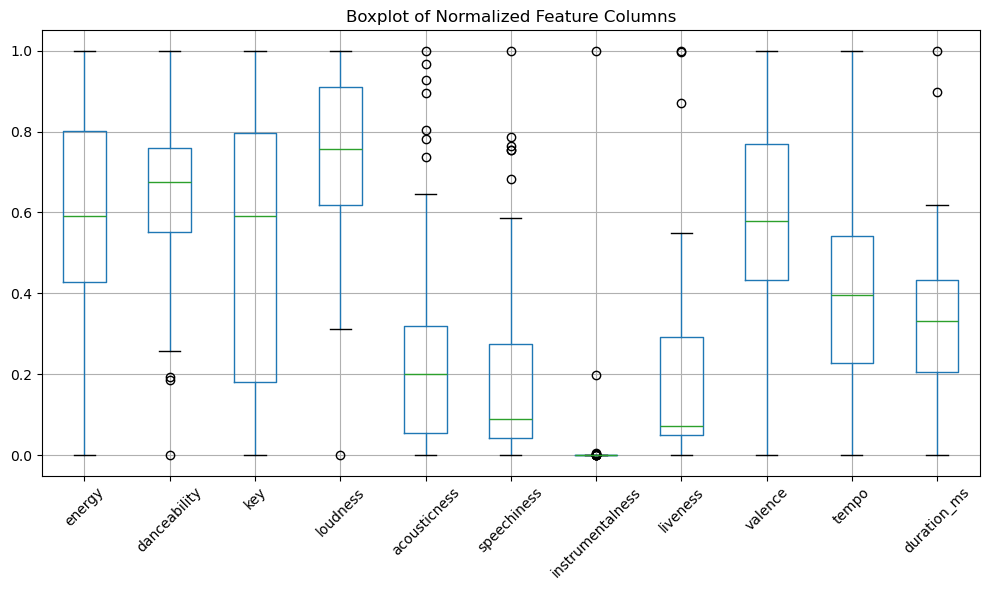

In [15]:
# Plot the boxplot
df_scaled.boxplot(figsize=(10, 6), rot=45)
plt.title("Boxplot of Normalized Feature Columns")
plt.tight_layout()
plt.show()

#### Insights 
- **Outlier Presence:** Features like acousticness and speechiness show a high concentration of outliers on the upper end, suggesting some tracks have unusually high values for these characteristics.
- Energy, key, valence and tempo appear to be more uniformly distributed, suggesting lower variability and fewer anomalies.
- It's also notable that Instrumentalness has a median near zero, indicating that **most tracks are not highly instrumental**, while the outliers represent the few that are.

**We'll keep these outliers for this analysis, as top music tracks often have extreme values.**

## 3. Exploratory Data Analysis

### 3.1. Summary of Dataset

In [16]:
def summarize_dataframe(df):
    """
    Generate and display a summary of the dataset including
    number of observations, number of features, and lists
    of categorical and numeric columns.
    """
    cat = df.select_dtypes(include="object").columns.tolist()
    num = df.select_dtypes(include="number").columns.tolist()

    summary = pd.DataFrame(
        {
            "Description": [
                "Number of observations",
                "Number of features",
                f"Categorical features ({len(cat)})",
                f"Numeric features ({len(num)})",
            ],
            "Value": [df.shape[0], df.shape[1], ", ".join(cat), ", ".join(num)],
        }
    )

    pd.set_option("display.max_colwidth", None)
    display(summary)

In [17]:
summarize_dataframe(df)

,Description,Value
0,Number of observations,50
1,Number of features,15
2,Categorical features (4),"artist, album, track_name, genre"
3,Numeric features (11),"energy, danceability, key, loudness, acousticness, speechiness, instrumentalness, liveness, valence, tempo, duration_ms"


### 3.2. TOP Artists Overview

In [18]:
# Count how many times each artist appears
artist_counts = df["artist"].value_counts()

In [19]:
def summarize_artists_table(artist_counts, min_tracks=2):
    """
    Return a DataFrame of artists with > 1 tracks.
    Adds a 'status' column to indicate top artist(s).
    """
    max_tracks = artist_counts.max()

    # Filter artists with ≥ min_tracks
    popular_artists = artist_counts[artist_counts >= min_tracks]
    df_popular = popular_artists.reset_index()
    df_popular.columns = ["artist", "num_top_tracks"]

    # Tag top artist(s)
    df_popular["status"] = df_popular["num_top_tracks"].apply(
        lambda x: "Top Artist" if x == max_tracks else "Multiple Tracks"
    )

    print(
        f"Total Artists: {len(df_popular) + (artist_counts == 1).sum()}\n"
        f"Top artist(s) with {max_tracks} track(s): "
        f"{', '.join(df_popular[df_popular["num_top_tracks"] == max_tracks]["artist"])}"
    )
    print(
        f"Artists with ≥ {min_tracks} top track(s): {len(df_popular)}\n"
        f"Artists with 1 top track: {(artist_counts == 1).sum()}\n"
    )

    return df_popular.sort_values(by="num_top_tracks", ascending=False)

In [20]:
df_summary = summarize_artists_table(artist_counts)
display(df_summary)

Total Artists: 40
Top artist(s) with 3 track(s): Billie Eilish, Dua Lipa, Travis Scott
Artists with ≥ 2 top track(s): 7
Artists with 1 top track: 33



,artist,num_top_tracks,status
0,Billie Eilish,3,Top Artist
1,Dua Lipa,3,Top Artist
2,Travis Scott,3,Top Artist
3,Justin Bieber,2,Multiple Tracks
4,Harry Styles,2,Multiple Tracks
5,Lewis Capaldi,2,Multiple Tracks
6,Post Malone,2,Multiple Tracks


#### Insights 
- There are 40 artist in the list
- The most popular artists: **Billie Eilish, Dua Lipa, Travis Scott** each having 3 of their tracks in the top 50 list.
- Justin Bieber, Harry Styles, Lewis Capaldi, Post Malone has 2 of their tracks on the list.

### 3.3. Number of Artists by Track Visualization

In [21]:
# How many artists fall into each count bucket
artist_freq = artist_counts.value_counts().sort_index()

# Create a DataFrame for plotting
df_artist_freq = artist_freq.reset_index(name="num_artists")
df_artist_freq.columns = ["track_count", "num_artists"]

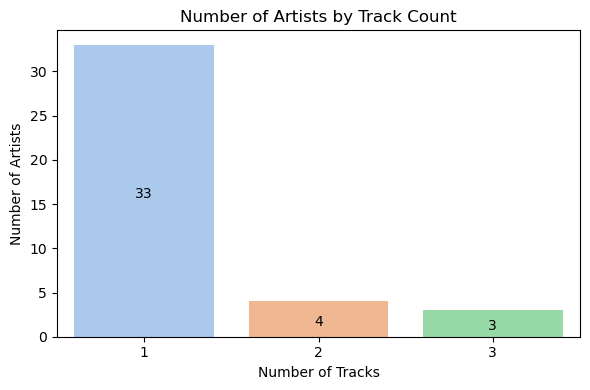

In [22]:
# Plotting
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x="track_count",
    y="num_artists",
    data=df_artist_freq,
    palette="pastel",
    hue="track_count",
    legend=False,
)

for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="center", padding=-2)

plt.title("Number of Artists by Track Count")
plt.xlabel("Number of Tracks")
plt.ylabel("Number of Artists")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Insights 
- The vast majority of artists in Top50 (33 out of 40s) have only one track included.
- A much smaller number of artists have multiple tracks, with 4 artists contributing two tracks and 3 artists contributing three tracks.

### 3.4. TOP Albums

In [23]:
def summarize_top_albums(df, min_tracks=2):
    """
    Summarize albums that have > 1 track in top tracks.
    Returns a sorted DataFrame with album name, artist, and number of top tracks.
    """
    # Count number of top tracks per album
    album_counts = df["album"].value_counts()
    multi_track_albums = album_counts[album_counts >= min_tracks].index

    # Filter only albums meeting the threshold
    df_multi = df[df["album"].isin(multi_track_albums)]

    # Group summary by album
    df_album_summary = (
        df_multi.groupby("album")
        .agg(artist=("artist", "first"), num_top_tracks=("track_name", "count"))
        .reset_index()
        .sort_values(by="num_top_tracks", ascending=False).reset_index(drop=True)
    )

    # Reorder columns
    df_album_summary = df_album_summary[["album", "artist", "num_top_tracks"]]

    return df_album_summary

In [24]:
display(summarize_top_albums(df))

,album,artist,num_top_tracks
0,Future Nostalgia,Dua Lipa,3
1,Changes,Justin Bieber,2
2,Fine Line,Harry Styles,2
3,Hollywood'S Bleeding,Post Malone,2


In [25]:
unique_albums = df["album"].nunique()
print(f"Total number of unique albums: {unique_albums}")

Total number of unique albums: 45


#### Insights 
- There are 45 albums appearing in the Top 50 list.
- 4 Albums appear more than one time
- Future Nostalgia by Dua Lipa is the most popular one, appearing 3 times.

### 3.5. Feature Overview

#### 3.5.1. Danceability

**High Danceability**

Danceability values above **0.7 or 0.75** are often used as a threshold to define "high." This implies that the track possesses a strong, consistent rhythm, stable tempo, and overall feel that makes it easy to dance to.

In [80]:
def high_danceability_tracks(df, threshold=0.7):
    """
    Prints and returns tracks with danceability above the given threshold.
    """
    tracks = df[df["danceability"] > threshold].sort_values(
        "danceability", ascending=False
    )
    print(
        f"There are {len(tracks)} track(s) that have a danceability score above {threshold}\n"
    )
    return tracks.head()

In [81]:
high_danceability_tracks(df)

There are 32 track(s) that have a danceability score above 0.7



,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
27,Cardi B,Wap (Feat. Megan Thee Stallion),Wap (Feat. Megan Thee Stallion),0.454,0.935,1,-7.509,0.0194,0.3750,0.000000,0.0824,0.357,133.073,187541,Hip-Hop/Trap
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0.586,0.896,10,-6.687,0.1040,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
39,Regard,Ride It,Ride It,0.751,0.880,7,-4.258,0.1770,0.0874,0.000064,0.1060,0.884,117.948,157606,Dance/Electronic
28,Surfaces,Where The Light Is,Sunday Best,0.525,0.878,5,-6.832,0.1830,0.0578,0.000000,0.0714,0.694,112.022,158571,Electro-pop
33,Benee,Hey U X,Supalonely (Feat. Gus Dapperton),0.631,0.862,7,-4.746,0.2910,0.0515,0.000209,0.1230,0.841,128.978,223488,Alternative/Indie


#### Insights
- A significant majority (32 out of 50) of 2020's top tracks boasted high danceability scores (above 0.7)
- The most danceable track in the 2020 Top 50 was Cardi B's Hip-Hop/Trap hit **'WAP' (Feat. Megan Thee Stallion)**, with an exceptional score of 0.935

**Low Danceability**

Danceability values below 0.40 indicate that a track has a less prominent beat, an irregular tempo, or a structure that doesn't lend itself easily to dancing.

In [82]:
def low_danceability_tracks(df, threshold=0.4):
    """
    Prints and returns tracks with danceability below the given threshold.
    """
    tracks = df[df["danceability"] < threshold].sort_values("danceability")
    print(
        f"There are {len(tracks)} track(s) that have a danceability score below {threshold}\n"
    )
    return tracks.head()

In [83]:
low_danceability_tracks(df)

There are 1 track(s) that have a danceability score below 0.4



,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
44,Billie Eilish,Lovely (With Khalid),Lovely (With Khalid),0.296,0.351,4,-10.109,0.934,0.0333,0.0,0.095,0.12,115.284,200186,Chamber pop


#### Insights
- Only one track from the Top 50 dataset registered a low danceability score, indicating its rarity among chart-topping hits.
- Lowest Danceability track was Chamber pop hit **Lovely (With Khalid)** by Billie Eilish (0.351)

#### 3.5.2. Loudness

**High Loudness**

0 dB represents the maximum possible loudness, values approaching it (e.g., -1.0 dB to -5.0 dB) are considered very high.

In [84]:
def high_loudness_tracks(df, threshold=-5):
    """
    Prints and returns tracks with loudness above the given threshold.
    """
    tracks = df[df["loudness"] > threshold].sort_values("loudness", ascending=False)
    print(
        f"There are {len(tracks)} track(s) that have a loudness score above {threshold}\n"
    )
    return tracks.head()

In [31]:
high_loudness_tracks(df)

There are 19 track(s) that have a loudness score above -5



,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
10,Karol G,Tusa,Tusa,0.715,0.803,2,-3.280,0.2950,0.2980,0.000134,0.0574,0.574,101.085,200960,Pop
40,Travis Scott,Birds In The Trap Sing Mcknight,Goosebumps,0.728,0.841,7,-3.370,0.0847,0.0484,0.000000,0.1490,0.430,130.049,243837,Hip-Hop/Rap
31,Dua Lipa,Future Nostalgia,Break My Heart,0.729,0.730,4,-3.434,0.1670,0.0883,0.000001,0.3490,0.467,113.013,221820,Dance-pop/Disco
38,Maluma,Papi Juancho,Hawái,0.727,0.783,6,-3.454,0.1850,0.3890,0.000025,0.0626,0.558,180.067,199112,Pop
12,Post Malone,Hollywood'S Bleeding,Circles,0.762,0.695,0,-3.497,0.1920,0.0395,0.002440,0.0863,0.553,120.042,215280,Pop/Soft Rock


#### Insights
- Nearly 40% of the Top 50 tracks (19 songs) register high loudness scores
- Pop hit **Tusa** by Karol G stands out as the loudest track in the dataset. (-3.280 dB)

**Low Loudness**

Loudness score is generally considered low when it is: -15.0 dB to -25.0 dB
These values indicate a track that is significantly quieter.

Since there are no values in our dataset in this range, we calculate "low" relative to the other tracks in Top 50.

In [127]:
print("\n--- Quartiles for Loudness ---")
loudness_q1 = df["loudness"].quantile(0.25)
loudness_median = df["loudness"].quantile(0.50)
loudness_q3 = df["loudness"].quantile(0.75)

print(f"25th Percentile (Q1) Loudness: {loudness_q1:.3f} dB")
print(f"50th Percentile (Median) Loudness: {loudness_median:.3f} dB")
print(f"75th Percentile (Q3) Loudness: {loudness_q3:.3f} dB")


--- Quartiles for Loudness ---
25th Percentile (Q1) Loudness: -7.553 dB
50th Percentile (Median) Loudness: -5.992 dB
75th Percentile (Q3) Loudness: -4.285 dB


- Will use the rounded 25th Percentile of -8

In [99]:
def low_loudness_tracks(df, threshold=-8):
    """
    Prints and returns tracks with loudness below the given threshold.
    """
    tracks = df[df["loudness"] < threshold].sort_values("loudness")
    print(
        f"There are {len(tracks)} track(s) that have a loudness score below {threshold}\n"
    )
    return tracks.head()

In [100]:
low_loudness_tracks(df)

There are 9 track(s) that have a loudness score below -8



,artist,album,track_name,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
24,Billie Eilish,Everything I Wanted,Everything I Wanted,0.225,0.704,6,-14.454,0.902,0.0994,0.657000,0.106,0.243,120.006,245426,Pop
26,Billie Eilish,"When We All Fall Asleep, Where Do We Go?",Bad Guy,0.425,0.701,7,-10.965,0.328,0.3750,0.130000,0.100,0.562,135.128,194088,Electro-pop
44,Billie Eilish,Lovely (With Khalid),Lovely (With Khalid),0.296,0.351,4,-10.109,0.934,0.0333,0.000000,0.095,0.120,115.284,200186,Chamber pop
47,Jp Saxe,If The World Was Ending (Feat. Julia Michaels),If The World Was Ending - Feat. Julia Michaels,0.473,0.464,1,-10.086,0.866,0.1290,0.000000,0.109,0.604,75.801,208687,Pop
15,Drake,Dark Lane Demo Tapes,Toosie Slide,0.490,0.830,1,-8.820,0.289,0.2090,0.000003,0.113,0.845,81.604,247059,Hip-Hop/Rap


#### Insights
- While the Top 50 generally comprises loud tracks, 9 songs stand out at the quieter end of the spectrum, falling into the 'very low' loudness category relative to the rest of our dataset.
- The most 'silent' track is the Pop hit **Everything I Wanted** by Billie Eilish. Its low loudness score -14.5 dB

#### 3.5.3. Length

In [101]:
def format_duration(duration_ms):
    """
    Convert duration from milliseconds to mm:ss format.
    """
    seconds = duration_ms / 1000
    minutes = int(seconds // 60)
    seconds = int(seconds % 60)
    return f"{minutes}:{seconds:02d}"

In [102]:
def get_extreme_duration_tracks(df: pd.DataFrame) -> pd.DataFrame:
    """
    Returns the longest and shortest tracks in mm:ss format.

    Args:
        df (pd.DataFrame): Input dataset containing track info.

    Returns:
        pd.DataFrame: Summary with type, track name, artist, and formatted duration.
    """
    longest = df.loc[df["duration_ms"].idxmax()]
    shortest = df.loc[df["duration_ms"].idxmin()]

    results = {
        "Type": ["Longest", "Shortest"],
        "Track Name": [longest["track_name"], shortest["track_name"]],
        "Artist": [longest["artist"], shortest["artist"]],
        "Duration (mm:ss)": [
            format_duration(longest["duration_ms"]),
            format_duration(shortest["duration_ms"]),
        ],
    }

    return pd.DataFrame(results)

In [103]:
get_extreme_duration_tracks(df)

,Type,Track Name,Artist,Duration (mm:ss)
0,Longest,Sicko Mode,Travis Scott,5:12
1,Shortest,Mood (Feat. Iann Dior),24Kgoldn,2:20


#### 3.5.4. Genre

In [104]:
def analyze_genres(df):
    genre_counts = df["genre"].value_counts()
    most_popular_genre = genre_counts.idxmax()
    most_popular_count = genre_counts.max()
    one_song_genres = genre_counts[genre_counts == 1]
    unique_genres = df["genre"].nunique()

    print(f"Most popular genre: '{most_popular_genre}' with {most_popular_count} tracks.")
    print(f"Genres with only one song ({one_song_genres.count()} total):\n{one_song_genres}\n")
    print(f"Total number of unique genres: {unique_genres}\n")

In [105]:
# Visualize genre distribution
def plot_genre_distribution(df):
    genre_counts = df["genre"].value_counts()
    genre_counts.plot(kind="barh", figsize=(8, 4), color="limegreen")
    plt.title("Genre Distribution")
    plt.xlabel("Number of Tracks")
    plt.ylabel("Genre")
    plt.gca().invert_yaxis()
    plt.show()

In [106]:
def run_genre_analysis(df, plot=False):
    analyze_genres(df)
    if plot:
        plot_genre_distribution(df)

Most popular genre: 'Pop' with 14 tracks.
Genres with only one song (10 total):
genre
Nu-disco                              1
R&B/Hip-Hop alternative               1
Pop/Soft Rock                         1
Pop rap                               1
Hip-Hop/Trap                          1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Alternative/reggaeton/experimental    1
Chamber pop                           1
Name: count, dtype: int64

Total number of unique genres: 16



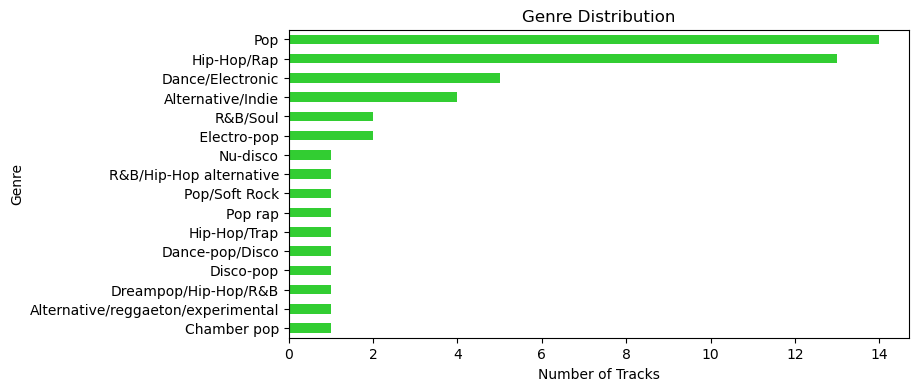

In [107]:
run_genre_analysis(df, plot=True)

#### Insights
- Pop (14 tracks) and Hip-Hop/Rap (10 tracks) together account for nearly half (24 out of 50) of the most streamed songs.

### 3.6. Correlation Overview

In [108]:
def find_correlations(df, label, lower_bound, upper_bound):
    """
    Extract correlation values between numeric features in a specific range.

    Args:
        df (pd.DataFrame): Input DataFrame
        label: Label for the type of correlation
        lower_bound: Lower threshold
        upper_bound: Upper threshold

    Returns:
        pd.DataFrame: Filtered correlation matrix
    """
    numeric_df = df.select_dtypes(include="number")
    corr_matrix = numeric_df.corr()

    # Mask upper triangle to avoid duplicates
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    corr_matrix = corr_matrix.mask(mask)

    filtered = corr_matrix[(corr_matrix > lower_bound) & (corr_matrix < upper_bound)]
    filtered = filtered.dropna(how="all").dropna(how="all", axis=1)

    print(f"{label} features (correlation between {lower_bound} and {upper_bound}):")

    return filtered

#### 3.6.1. Strongly Positive Corellation

In [109]:
find_correlations(df, "Strongly positive", 0.7, 1.0)

Strongly positive features (correlation between 0.7 and 1.0):


,energy
loudness,0.79164


#### 3.6.2. Strongly Negative Corellation

In [110]:
find_correlations(df, "Strongly negative", -1.0, -0.6)

Strongly negative features (correlation between -1.0 and -0.6):


,energy
acousticness,-0.682479


#### 3.6.3. Weak to no correlation

In [111]:
find_correlations(df, "Weak to no correlation", -0.1, 0.1)

Weak to no correlation features (correlation between -0.1 and 0.1):


,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence
key,0.062428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,NaN,NaN,-0.009178,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,0.074267,NaN,-0.094965,-0.021693,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,-0.017706,0.020802,NaN,NaN,0.028948,NaN,NaN,NaN
liveness,0.069487,-0.006648,NaN,-0.069939,NaN,NaN,-0.087034,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,0.053867,NaN,-0.033366,NaN
tempo,0.075191,NaN,0.080475,NaN,NaN,NaN,0.018853,0.025457,0.045089
duration_ms,0.081971,-0.033763,-0.003345,0.064130,-0.010988,NaN,NaN,-0.090188,-0.039794


## 4. Statistical Comparison

This section examines the feature **(danceability, loudness, acousticness)** scores across selected music genres by:
- Comparing their mean feature values
- Visualizing score distributions
- Conducting pairwise t-tests to assess whether observed differences are statistically significant

The goal is to determine if these features varies meaningfully between genres such as Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie.

In [112]:
# Define genre selection
selected_genres = ["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"]

### 4.1. Danceability between genres

#### 4.1.1 Danceability Means Comparison

In [113]:
# Average danceability scores for selected genres
genre_danceability = (
    df.groupby("genre")["danceability"]
    .mean()
    .loc[selected_genres]
    .sort_values(ascending=False)
)

print("Danceability scores comparison between selected genres:")
display(genre_danceability.to_frame())

Danceability scores comparison between selected genres:


,danceability
genre,
Hip-Hop/Rap,0.765538
Dance/Electronic,0.755000
Pop,0.677571
Alternative/Indie,0.661750


#### 4.1.2. Danceability Score Distribution

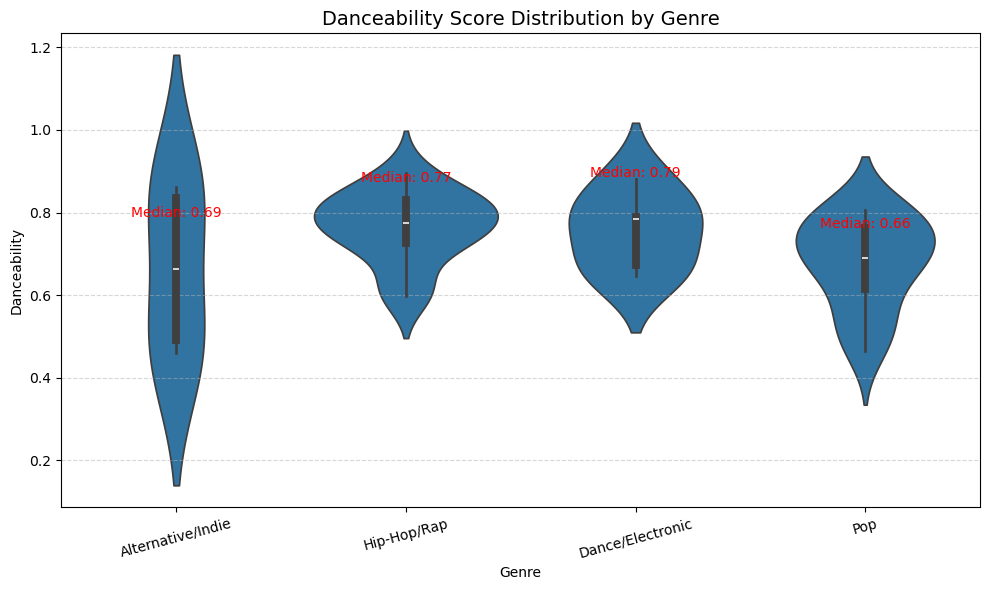

In [114]:
# Violin plot of danceability distributions by genre
filtered_df = df[df["genre"].isin(selected_genres)]
genre_medians = filtered_df.groupby("genre")["danceability"].median()

plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_df, x="genre", y="danceability", inner="box")

# Annotate medians
for i, genre in enumerate(selected_genres):
    median = genre_medians[genre]
    plt.text(i, median + 0.1, f"Median: {median:.2f}", ha="center", color="red")

# Plot aesthetics
plt.title("Danceability Score Distribution by Genre", fontsize=14)
plt.ylabel("Danceability")
plt.xlabel("Genre")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

#### 4.1.3. Danceability T-Test Comparison

General Hypotheses for Danceability Comparison Between Two Genres:

- Null Hypothesis (H₀): There is no difference in the mean danceability between the selected genre pairs.
- Alternative Hypothesis (H₁): There is a difference in the mean danceability between the two genres.

This is a two-tailed test, evaluating whether one genre tends to be more or less danceable than the other on average.

In [115]:
# Pairwise T-tests for danceability between genres
from scipy.stats import ttest_ind

results = []

for i, genre_a in enumerate(selected_genres):
    for genre_b in selected_genres[i + 1:]:
        group_a = df[df["genre"] == genre_a]["danceability"]
        group_b = df[df["genre"] == genre_b]["danceability"]
        
        t_stat, p_value = ttest_ind(group_a, group_b, equal_var=False, nan_policy="omit")
        
        results.append({
            "Genre A": genre_a,
            "Genre B": genre_b,
            "T-Statistic": round(t_stat, 3),
            "P-Value": round(p_value, 4),
            "Significant": "Yes" if p_value < 0.05 else "No"
        })

ttest_df = pd.DataFrame(results)

print("Danceability Genre Pairwise T-Test Results:")
display(ttest_df)

Danceability Genre Pairwise T-Test Results:


,Genre A,Genre B,T-Statistic,P-Value,Significant
0,Pop,Hip-Hop/Rap,-2.331,0.0284,Yes
1,Pop,Dance/Electronic,-1.502,0.1707,No
2,Pop,Alternative/Indie,0.144,0.8932,No
3,Hip-Hop/Rap,Dance/Electronic,0.217,0.8346,No
4,Hip-Hop/Rap,Alternative/Indie,0.959,0.4021,No
5,Dance/Electronic,Alternative/Indie,0.820,0.4587,No


#### Results:

**Pop vs. Hip-Hop/Rap shows a statistically significant difference in danceability**
- P-value: 0.0284 < 0.05 → We reject the null hypothesis
- This suggests listeners may perceive Pop and Hip-Hop/Rap differently in terms of rhythmic energy or movement potential

#### 4.1.4. Effect Size (Cohen’s d) for Two Independent Samples

In [116]:
def cohens_d(group1, group2):
    """Compute Cohen's d for two independent samples."""
    mean_diff = np.mean(group1) - np.mean(group2)
    pooled_std = np.sqrt(
        ((np.std(group1, ddof=1) ** 2) + (np.std(group2, ddof=1) ** 2)) / 2
    )
    return round(mean_diff / pooled_std, 3)

In [117]:
def interpret_effect_size(d):
    abs_d = abs(d)
    if abs_d < 0.2:
        return "Negligible"
    elif abs_d < 0.5:
        return "Small"
    elif abs_d < 0.8:
        return "Medium"
    else:
        return "Large"

In [118]:
effect_sizes = []

for i, genre_a in enumerate(selected_genres):
    for genre_b in selected_genres[i + 1:]:
        group_a = df[df["genre"] == genre_a]["danceability"].dropna()
        group_b = df[df["genre"] == genre_b]["danceability"].dropna()
        
        d = cohens_d(group_a, group_b)
        interpretation = interpret_effect_size(d)

        effect_sizes.append({
            "Genre A": genre_a,
            "Genre B": genre_b,
            "Cohen's d": d,
            "Interpretation": interpretation

        })

effect_sizes_danceability_df = pd.DataFrame(effect_sizes)
display(effect_sizes_danceability_df)

,Genre A,Genre B,Cohen's d,Interpretation
0,Pop,Hip-Hop/Rap,-0.894,Large
1,Pop,Dance/Electronic,-0.755,Medium
2,Pop,Alternative/Indie,0.094,Negligible
3,Hip-Hop/Rap,Dance/Electronic,0.117,Negligible
4,Hip-Hop/Rap,Alternative/Indie,0.644,Medium
5,Dance/Electronic,Alternative/Indie,0.570,Medium


### 4.2. Loudness between genres

#### 4.2.1. Loudness Score Comparison

In [119]:
# Average loudness scores for selected genres
genre_loudness = (
    df.groupby("genre")["loudness"]
    .mean()
    .loc[selected_genres]
    .sort_values()
)

print("Loudness scores comparison between selected genres:")
display(genre_loudness.to_frame())

Loudness scores comparison between selected genres:


,loudness
genre,
Hip-Hop/Rap,-6.917846
Pop,-6.460357
Alternative/Indie,-5.421000
Dance/Electronic,-5.338000


#### 4.2.2. Loudnes Score Distribution

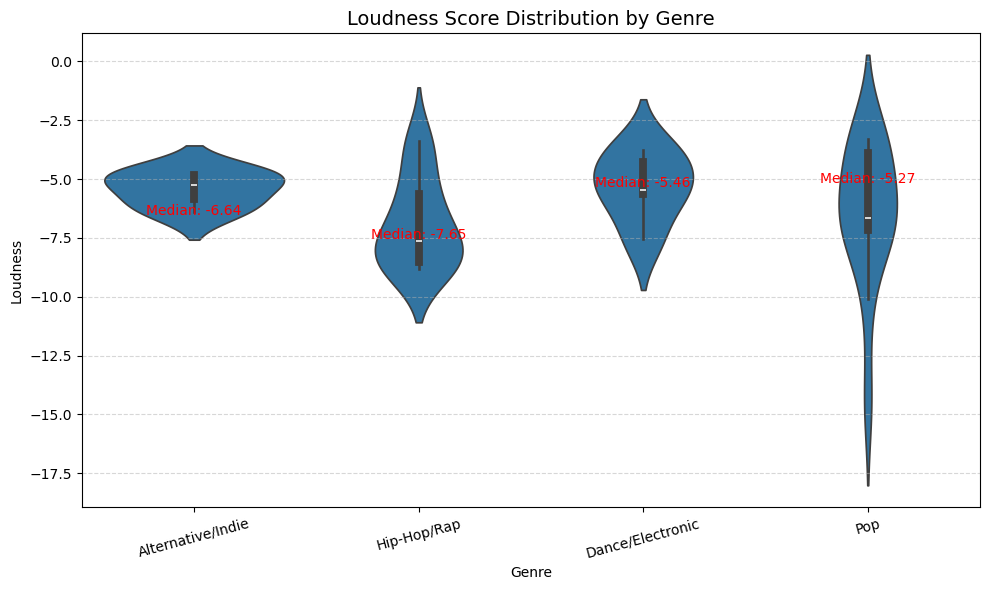

In [120]:
# Violin plot of loudness distributions by genre
filtered_df = df[df["genre"].isin(selected_genres)]
genre_medians = filtered_df.groupby("genre")["loudness"].median()

plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_df, x="genre", y="loudness", inner="box")

# Annotate medians
for i, genre in enumerate(selected_genres):
    median = genre_medians[genre]
    plt.text(i, median + 0.1, f"Median: {median:.2f}", ha="center", color="red")

# Plot aesthetics
plt.title("Loudness Score Distribution by Genre", fontsize=14)
plt.ylabel("Loudness")
plt.xlabel("Genre")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

#### 4.2.3. Loudness T-Test Comparison

General Hypotheses for Loudness Comparison Between Two Genres:

- Null Hypothesis (H₀): There is no difference in the mean loudness between selected genre pairs.
- Alternative Hypothesis (H₁): There is a difference in the mean loudness between the two genres.

This is a two-tailed test, testing whether one genre is either louder or softer on average than the other.

In [121]:
# Pairwise T-tests for loudness between genres
from scipy.stats import ttest_ind

results = []

for i, genre_a in enumerate(selected_genres):
    for genre_b in selected_genres[i + 1:]:
        group_a = df[df["genre"] == genre_a]["loudness"]
        group_b = df[df["genre"] == genre_b]["loudness"]
        
        t_stat, p_value = ttest_ind(group_a, group_b, equal_var=False, nan_policy="omit")
        
        results.append({
            "Genre A": genre_a,
            "Genre B": genre_b,
            "T-Statistic": round(t_stat, 3),
            "P-Value": round(p_value, 4),
            "Significant": "Yes" if p_value < 0.05 else "No"
        })

ttest_df = pd.DataFrame(results)

print("Loudness Genre Pairwise T-Test Results:")
display(ttest_df)

Loudness Genre Pairwise T-Test Results:


,Genre A,Genre B,T-Statistic,P-Value,Significant
0,Pop,Hip-Hop/Rap,0.476,0.6389,No
1,Pop,Dance/Electronic,-1.077,0.2989,No
2,Pop,Alternative/Indie,-1.163,0.2620,No
3,Hip-Hop/Rap,Dance/Electronic,-1.871,0.0928,No
4,Hip-Hop/Rap,Alternative/Indie,-2.295,0.0389,Yes
5,Dance/Electronic,Alternative/Indie,0.108,0.9172,No


#### Results:

**Hip-Hop/Rap vs. Alternative/Indie** shows a statistically significant difference in loudness

- P-value: 0.0389 < 0.05 → We reject the null hypothesis
- This suggests Hip-Hop/Rap has a significantly lower mean loudness than Alternative/Indie.

#### 4.3.4. Effect Size (Cohen’s d)

In [122]:
effect_sizes = []

for i, genre_a in enumerate(selected_genres):
    for genre_b in selected_genres[i + 1:]:
        group_a = df[df["genre"] == genre_a]["loudness"].dropna()
        group_b = df[df["genre"] == genre_b]["loudness"].dropna()
        
        d = cohens_d(group_a, group_b)
        interpretation = interpret_effect_size(d)

        effect_sizes.append({
            "Genre A": genre_a,
            "Genre B": genre_b,
            "Cohen's d": d,
            "Interpretation": interpretation

        })

effect_sizes_loudness_df = pd.DataFrame(effect_sizes)
display(effect_sizes_loudness_df)

,Genre A,Genre B,Cohen's d,Interpretation
0,Pop,Hip-Hop/Rap,0.182,Negligible
1,Pop,Dance/Electronic,-0.473,Small
2,Pop,Alternative/Indie,-0.472,Small
3,Hip-Hop/Rap,Dance/Electronic,-0.930,Large
4,Hip-Hop/Rap,Alternative/Indie,-1.036,Large
5,Dance/Electronic,Alternative/Indie,0.070,Negligible


### 4.3 Acousticness between genres

#### 4.3.1. Acousticness Score Comparison

In [123]:
# Average acousticness scores for selected genres
genre_acousticness = (
    df.groupby("genre")["acousticness"]
    .mean()
    .loc[selected_genres]
    .sort_values(ascending=False)
)

print("Acousticness scores comparison between selected genres:")
display(genre_acousticness.to_frame())

Acousticness scores comparison between selected genres:


,acousticness
genre,
Alternative/Indie,0.583500
Pop,0.323843
Hip-Hop/Rap,0.188741
Dance/Electronic,0.099440


#### 4.3.2. Acousticness Score Distribution

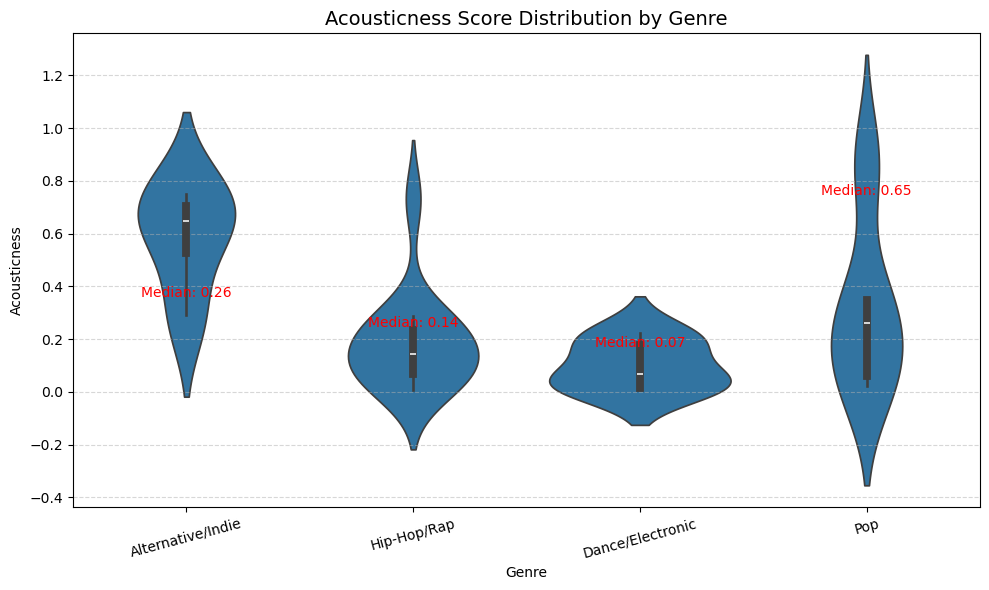

In [124]:
# Violin plot of acousticness distributions by genre
filtered_df = df[df["genre"].isin(selected_genres)]
genre_medians = filtered_df.groupby("genre")["acousticness"].median()

plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_df, x="genre", y="acousticness", inner="box")

# Annotate medians
for i, genre in enumerate(selected_genres):
    median = genre_medians[genre]
    plt.text(i, median + 0.1, f"Median: {median:.2f}", ha="center", color="red")

# Plot aesthetics
plt.title("Acousticness Score Distribution by Genre", fontsize=14)
plt.ylabel("Acousticness")
plt.xlabel("Genre")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

#### 4.3.3. Acousticness T-Test Comparison

General Hypotheses for Acousticness Comparison Between Two Genres:

- Null Hypothesis (H₀): There is no difference in the mean acousticness between selected genre pairs.
- Alternative Hypothesis (H₁): There is a difference in the mean acousticness between the two genres.

This is a two-tailed test, testing whether one genre is either more or less acoustic on average than the other.

In [125]:
# Pairwise T-tests for acousticness between genres
from scipy.stats import ttest_ind

results = []

for i, genre_a in enumerate(selected_genres):
    for genre_b in selected_genres[i + 1:]:
        group_a = df[df["genre"] == genre_a]["acousticness"]
        group_b = df[df["genre"] == genre_b]["acousticness"]
        
        t_stat, p_value = ttest_ind(group_a, group_b, equal_var=False, nan_policy="omit")
        
        results.append({
            "Genre A": genre_a,
            "Genre B": genre_b,
            "T-Statistic": round(t_stat, 3),
            "P-Value": round(p_value, 4),
            "Significant": "Yes" if p_value < 0.05 else "No"
        })

ttest_df = pd.DataFrame(results)

print("Acousticness Genre Pairwise T-Test Results:")
display(ttest_df)

Acousticness Genre Pairwise T-Test Results:


,Genre A,Genre B,T-Statistic,P-Value,Significant
0,Pop,Hip-Hop/Rap,1.358,0.1888,No
1,Pop,Dance/Electronic,2.357,0.0308,Yes
2,Pop,Alternative/Indie,-1.955,0.0875,No
3,Hip-Hop/Rap,Dance/Electronic,1.330,0.2046,No
4,Hip-Hop/Rap,Alternative/Indie,-3.451,0.0204,Yes
5,Dance/Electronic,Alternative/Indie,-4.374,0.0116,Yes


#### Results:

- **Dance/Electronic vs. Alternative/Indie**: A highly significant difference — suggesting very different acoustic profiles, likely due to synthetic textures in dance music vs. organic instrumentation in indie.
- **Hip-Hop/Rap vs. Alternative/Indie**: Also a meaningful contrast; could reflect production techniques, with hip-hop leaning toward beats and samples over acoustic instrumentation.
- **Pop vs. Dance/Electronic**: Statistically different, but only slightly—Pop may absorb acoustic qualities from both acoustic and electronic genres.




#### 4.3.4. Effect Size (Cohen’s d) for Two Independent Samples

In [126]:
effect_sizes = []

for i, genre_a in enumerate(selected_genres):
    for genre_b in selected_genres[i + 1:]:
        group_a = df[df["genre"] == genre_a]["acousticness"].dropna()
        group_b = df[df["genre"] == genre_b]["acousticness"].dropna()
        
        d = cohens_d(group_a, group_b)
        interpretation = interpret_effect_size(d)

        effect_sizes.append({
            "Genre A": genre_a,
            "Genre B": genre_b,
            "Cohen's d": d,
            "Interpretation": interpretation

        })

effect_sizes_df = pd.DataFrame(effect_sizes)
display(effect_sizes_df)

,Genre A,Genre B,Cohen's d,Interpretation
0,Pop,Hip-Hop/Rap,0.518,Medium
1,Pop,Dance/Electronic,0.955,Large
2,Pop,Alternative/Indie,-0.972,Large
3,Hip-Hop/Rap,Dance/Electronic,0.603,Medium
4,Hip-Hop/Rap,Alternative/Indie,-2.020,Large
5,Dance/Electronic,Alternative/Indie,-3.036,Large


#### Key Insights:
- **Alternative/Indie** consistently has much higher acousticness compared to all other genres.
- **Dance/Electronic** has the lowest acousticness, with stark differences compared to more organic genres.
- **Pop** is in a mid-range position, with acousticness levels below Alternative/Indie but above Dance/Electronic and Hip-Hop/Rap.
- The **strongest contrast** is between **Dance/Electronic** and **Alternative/Indie**.

# Exploratory Data Analysis (EDA) Highlights

- **Top Artists:** The analysis identifies Billie Eilish, Dua Lipa, and Travis Scott as the top artists, each with three tracks in the top 50.
- **Top Albums:** Dua Lipa's "Future Nostalgia" is the most represented album with three tracks.
- **Genre Distribution:** Pop is the most prevalent genre, with 14 tracks.

**Feature-Specific Insights**

- **Danceability:**

    - 32 out of the 50 tracks have a high danceability score (above 0.7).
    - "WAP" by Cardi B is the most danceable track, while "lovely" by Billie Eilish is the least.

- **Loudness:**

    - 19 tracks have a high loudness score (above -5 dB). "Tusa" by Karol G is the loudest.
    - 9 tracks have low loudness scores (below -8 dB), with three of them belonging to Billie Eilish.

- **Track Length:**

    - The longest song is "Sicko Mode" by Travis Scott (5:12).
    - The shortest is "Mood" by 24kGoldn (2:20).


**Statistical Comparisons Between Genres**

- **Danceability:** A statistically significant difference was found between Pop and Hip-Hop/Rap, Hip-Hop/Rap has a higher average danceability than Pop.

- **Loudness:** A significant difference was observed between Hip-Hop/Rap and Alternative/Indie, with Hip-Hop/Rap tracks being, on average, quieter.

- **Acousticness:** Alternative/Indie tracks are consistently more acoustic than all other genres in the comparison. Dance/Electronic tracks have the lowest acousticness scores.

## Recomendations:

#### For Marketing/Promotional Strategies:

- **Leverage top artists and albums for campaigns:** Use Billie Eilish, Dua Lipa, Travis Scott, and "Future Nostalgia" in marketing materials and promotional campaigns.

- **Create themed marketing campaigns:** Develop campaigns around "danceability," "energy levels" (loud vs. quiet), or even "song length" to attract specific audiences.

- **Target specific genres based on insights:** Direct marketing efforts towards audiences that align with the genre characteristics identified (e.g., promote Hip-Hop/Rap to dance enthusiasts).

#### For Data Analysis/Future Research:

- **Deep dive into "Pop" sub-genres:** Explore what makes the 14 Pop tracks prevalent – are there specific Pop sub-genres that dominate?

- **Analyze what contributes to high/low danceability:** Investigate specific musical features (BPM, rhythm, instrumentation) that lead to high or low danceability scores.

- **Investigate the characteristics of "acousticness":** Understand what musical elements contribute to higher or lower acousticness scores across genres.

- **Expand the dataset:** Analyze a larger dataset to see if these trends hold true across a wider range of popular music.